## Import all dependencies and libraries

In [144]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

## Transform source data to csv

In [145]:
# Importing library
import os
# Getting all the arff files from the current directory
files = [arff for arff in os.listdir('.') if arff.endswith(".arff")]

# Function for converting arff list to csv list
def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# Main loop for reading and writing files
for file in files:
    with open(file , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)

## Import data

In [146]:
df = pd.read_csv("Behavior of the urban traffic - modified.csv") 
print(df.shape)
df.head()
#print(df.tail())

(140, 18)


,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,7:00,0.0,0.0,T,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,7:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,8:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,8:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,9:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1


In [147]:
df.describe()

,Immobilized_bus,Broken_Truck,Occurrence_involving_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Tree_on_the_road,Intermittent_Semaphore,Slowness_in_traffic_percent
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.335714,8.007143,0.007143,0.114286,0.007143,14.400000,0.035714,0.042857,0.014286,9.980714
std,0.652728,84.448912,0.084515,0.495820,0.084515,169.022573,0.221529,0.203262,0.119092,4.323583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,3.400000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.300000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.950000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.500000
max,4.000000,1000.000000,1.000000,4.000000,1.000000,2000.000000,1.000000,1.000000,1.000000,23.400000


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
Hour                                     140 non-null object
Immobilized_bus                          140 non-null float64
Broken_Truck                             140 non-null float64
Vehicle_excess                           140 non-null object
Accident_victim                          140 non-null object
Running_over                             140 non-null object
Fire_vehicles                            140 non-null object
Occurrence_involving_freight             140 non-null float64
Incident_involving_dangerous_freight     140 non-null object
Lack_of_electricity                      140 non-null float64
Fire                                     140 non-null float64
Point_of_flooding                        140 non-null float64
Manifestations                           140 non-null float64
Defect_in_the_network_of_trolleybuses    140 non-null object
Tree_on_the_road                  

### Data Preparation

Check unique values for the given column to understand nature of data (Categorical/Numerical) and missing/empty rows, NA values etc. We will try to fill missing/empty/NA values discard rows and create columns for categorical variables.

#### Exploratory Analysis for Hour

0       1
1       2
2       3
3       4
4       5
       ..
135    23
136    24
137    25
138    26
139    27
Name: Hour, Length: 140, dtype: int64


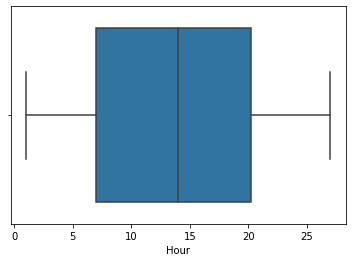

In [149]:
df['Hour'] = df['Hour'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])).apply(lambda x: (x - 420)/30 +1)
df['Hour'] = df['Hour'].astype('int64')
print(df['Hour'])
sns.boxplot('Hour', data = df)

#### Exploratory Analysis for Immobilized_bus feature

[0. 2. 1. 4.]
0.0    104
1.0     27
2.0      8
4.0      1
Name: Immobilized_bus, dtype: int64


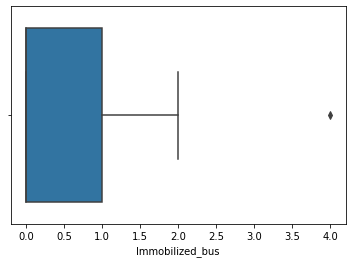

In [150]:
print(df.Immobilized_bus.unique())
print(df['Immobilized_bus'].value_counts(dropna=False))
sns.boxplot('Immobilized_bus', data = df)

In [151]:
df.loc[(df.Immobilized_bus == 0.0),'Immobilized_bus']=0
df.loc[(df.Immobilized_bus != 0.0),'Immobilized_bus']=1

In [152]:
print(df['Immobilized_bus'].value_counts(dropna=False))

0.0    104
1.0     36
Name: Immobilized_bus, dtype: int64


#### Exploratory Analysis for Broken_Truck feature

[   0. 1000.    2.    1.    5.    4.    3.]
0.0       66
1.0       44
2.0       17
3.0        6
4.0        5
5.0        1
1000.0     1
Name: Broken_Truck, dtype: int64


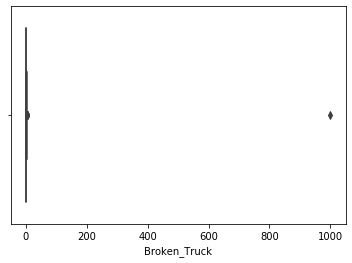

In [153]:
print(df.Broken_Truck.unique())
print(df['Broken_Truck'].value_counts(dropna=False))
sns.boxplot('Broken_Truck', data = df)

In [154]:
df.loc[(df.Broken_Truck == 0.0),'Broken_Truck']=0
df.loc[(df.Broken_Truck != 0.0),'Broken_Truck']=1

#### Exploratory Analysis for Vehicle_excess feature

In [155]:
print(df.Vehicle_excess.unique())
df.loc[(df.Vehicle_excess == ' f'),'Vehicle_excess']=' F'
print(df.Vehicle_excess.unique())

[' T' ' F' ' f']
[' T' ' F']


0    135
1      5
Name: Vehicle_excess, dtype: int64


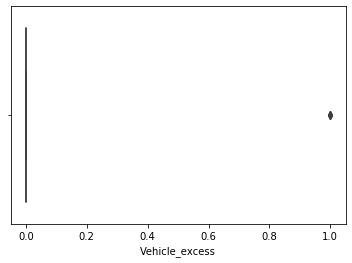

In [156]:
# Converting Yes to 1 and No to 0
df['Vehicle_excess'] = df['Vehicle_excess'].map({' T': 1, ' F': 0})
#df.Vehicle_excess.unique()
#print(df['Vehicle_excess'])
print(df['Vehicle_excess'].value_counts(dropna=False))
sns.boxplot('Vehicle_excess', data = df)

#### Exploratory Analysis for Accident_victim feature

In [157]:
print(df.Accident_victim.unique())
df.loc[(df.Accident_victim == ' -0.0'),'Accident_victim']=' 0.0'
print(df['Accident_victim'].value_counts(dropna=False))

[' 0.0' ' 1.0' ' 2.0' ' 3.0' ' -0.0' ' ']
 0.0    92
 1.0    33
 2.0    10
 3.0     3
         2
Name: Accident_victim, dtype: int64


In [158]:
df['Accident_victim'] = pd.to_numeric(df['Accident_victim'],errors='coerce')
print(df.Accident_victim.unique())
print(df['Accident_victim'].mean())
print(df['Accident_victim'].mode())

[ 0.  1.  2.  3. nan]
0.4492753623188406
0    0.0
dtype: float64


0.0    94
1.0    33
2.0    10
3.0     3
Name: Accident_victim, dtype: int64


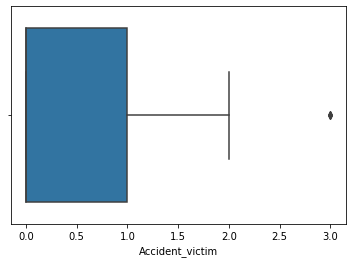

In [159]:
#Replace nan with mode
df['Accident_victim'].replace(np.nan, 0.0 , inplace = True)
df['Accident_victim'] = pd.to_numeric(df['Accident_victim'],errors='coerce')
print(df['Accident_victim'].value_counts(dropna=False))
sns.boxplot('Accident_victim', data = df)

In [160]:
df.loc[(df.Accident_victim == 0.0),'Accident_victim']=0
df.loc[(df.Accident_victim != 0.0),'Accident_victim']=1
print(df['Accident_victim'].value_counts(dropna=False))

0.0    94
1.0    46
Name: Accident_victim, dtype: int64


#### Exploratory Analysis for Running_over feature

[' 0.0' ' NO' ' 1.0' ' 2.0' ' -1.0']
[' 0.0' ' 1.0' ' 2.0']
 0.0    125
 1.0     14
 2.0      1
Name: Running_over, dtype: int64


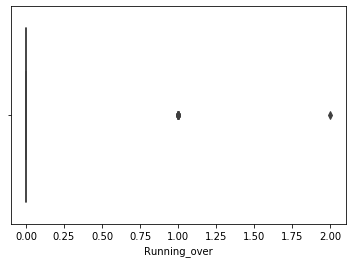

In [161]:
print(df.Running_over.unique())
df.loc[(df.Running_over == ' NO'),'Running_over']=' 0.0'
df.loc[(df.Running_over == ' -1.0'),'Running_over']=' 1.0'
print(df.Running_over.unique())
print(df['Running_over'].value_counts(dropna=False))
df['Running_over'] = pd.to_numeric(df['Running_over'],errors='coerce')
sns.boxplot('Running_over', data = df)

In [162]:
df.loc[(df.Running_over == 2.0),'Running_over']=0.0
print(df['Running_over'].value_counts(dropna=False))
print(df.Running_over.unique())

0.0    126
1.0     14
Name: Running_over, dtype: int64
[0. 1.]


#### Exploratory Analysis for Fire_vehicles feature

 NO     138
 0.0      1
 YES      1
Name: Fire_vehicles, dtype: int64
 NO     139
 YES      1
Name: Fire_vehicles, dtype: int64
0.0    139
1.0      1
Name: Fire_vehicles, dtype: int64


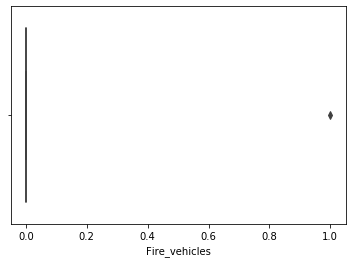

In [163]:
print(df['Fire_vehicles'].value_counts(dropna=False))
#df.replace(to_replace=' 0.0', value= ' NO', inplace = True)
df.loc[(df.Fire_vehicles == ' 0.0'),'Fire_vehicles']=' NO'
print(df['Fire_vehicles'].value_counts(dropna=False))
df.loc[(df.Fire_vehicles == ' NO'),'Fire_vehicles']=' 0.0'
df.loc[(df.Fire_vehicles == ' YES'),'Fire_vehicles']=' 1.0'
df['Fire_vehicles'] = pd.to_numeric(df['Fire_vehicles'],errors='coerce')
print(df['Fire_vehicles'].value_counts(dropna=False))

sns.boxplot('Fire_vehicles', data = df)

#### Exploratory Analysis for Occurrence_involving_freight feature

0.0    139
1.0      1
Name: Occurrence_involving_freight, dtype: int64
0.0    139
1.0      1
Name: Occurrence_involving_freight, dtype: int64


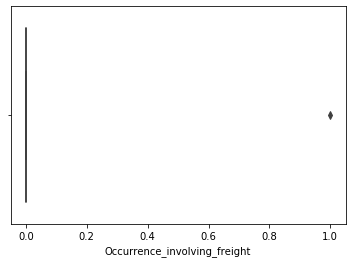

In [164]:
df.Occurrence_involving_freight.unique()
#print(df['Occurrence_involving_freight'])
print(df['Occurrence_involving_freight'].value_counts(dropna=False))
df['Occurrence_involving_freight'] = pd.to_numeric(df['Occurrence_involving_freight'],errors='coerce')
print(df['Occurrence_involving_freight'].value_counts(dropna=False))
sns.boxplot('Occurrence_involving_freight', data = df)

#### Exploratory Analysis for Incident_involving_dangerous_freight feature

 0.0    137
          2
 1.0      1
Name: Incident_involving_dangerous_freight, dtype: int64
0     0.0
dtype: object
 0.0    139
 1.0      1
Name: Incident_involving_dangerous_freight, dtype: int64
0.0    139
1.0      1
Name: Incident_involving_dangerous_freight, dtype: int64


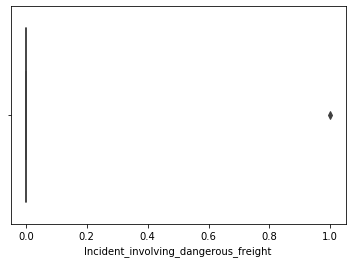

In [165]:
df.Incident_involving_dangerous_freight.unique()
#print(df['Incident_involving_dangerous_freight'])
print(df['Incident_involving_dangerous_freight'].value_counts(dropna=False)) 
print(df['Incident_involving_dangerous_freight'].mode())

df.loc[(df.Incident_involving_dangerous_freight == ' '),'Incident_involving_dangerous_freight']=' 0.0'
print(df['Incident_involving_dangerous_freight'].value_counts(dropna=False))

df['Incident_involving_dangerous_freight'] = pd.to_numeric(df['Incident_involving_dangerous_freight'],errors='coerce')
print(df['Incident_involving_dangerous_freight'].value_counts(dropna=False))

sns.boxplot('Incident_involving_dangerous_freight', data = df)

#### Exploratory Analysis for Lack_of_electricity feature

[0. 1. 2. 4. 3.]
0.0    130
1.0      7
3.0      1
4.0      1
2.0      1
Name: Lack_of_electricity, dtype: int64
0.0    130
1.0     10
Name: Lack_of_electricity, dtype: int64


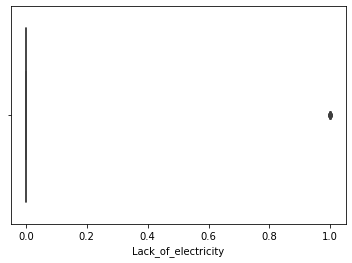

In [166]:
print(df.Lack_of_electricity.unique())
print(df['Lack_of_electricity'].value_counts(dropna=False)) 
df.loc[(df.Lack_of_electricity !=0.0),'Lack_of_electricity']=1.0
print(df['Lack_of_electricity'].value_counts(dropna=False))


sns.boxplot('Lack_of_electricity', data = df)

#### Exploratory Analysis for Fire feature

0.0    139
1.0      1
Name: Fire, dtype: int64


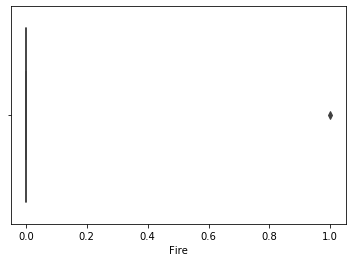

In [167]:
df.Fire.unique()
#print(df['Fire'])
print(df['Fire'].value_counts(dropna=False))
df['Fire'] = pd.to_numeric(df['Fire'],errors='coerce')

sns.boxplot('Fire', data = df)

#### Exploratory Analysis for Point_of_flooding feature

0.0       133
1.0         3
3.0         2
7.0         1
2000.0      1
Name: Point_of_flooding, dtype: int64


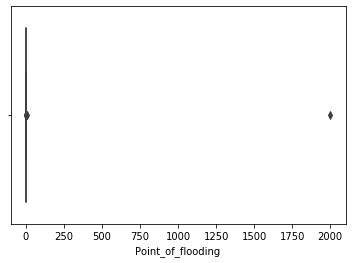

In [168]:
df.Point_of_flooding.unique()
print(df['Point_of_flooding'].value_counts(dropna=False))
sns.boxplot('Point_of_flooding', data = df)

#### Exploratory Analysis for Manifestations feature

 0.0    133
 1.0      6
-1.0      1
Name: Manifestations, dtype: int64
0.0    133
1.0      7
Name: Manifestations, dtype: int64
0.0    133
1.0      7
Name: Manifestations, dtype: int64


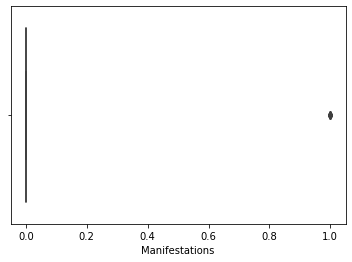

In [169]:
#print(df.Manifestations.unique())
print(df['Manifestations'].value_counts(dropna=False))
#df['Manifestations'].mode()

df.loc[(df.Manifestations == -1.0),'Manifestations']=1.0
print(df['Manifestations'].value_counts(dropna=False))

df['Manifestations'] = pd.to_numeric(df['Manifestations'],errors='coerce')
print(df['Manifestations'].value_counts(dropna=False))

sns.boxplot('Manifestations', data = df)

#### Exploratory Analysis for Defect_in_the_network_of_trolleybuses feature

 0.0     118
 1.0      17
           2
 2.0       1
 -8.0      1
 3.0       1
Name: Defect_in_the_network_of_trolleybuses, dtype: int64
<bound method Series.mode of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
135     1.0
136        
137     0.0
138     0.0
139     0.0
Name: Defect_in_the_network_of_trolleybuses, Length: 140, dtype: object>
 0.0    121
 1.0     19
Name: Defect_in_the_network_of_trolleybuses, dtype: int64
0.0    121
1.0     19
Name: Defect_in_the_network_of_trolleybuses, dtype: int64


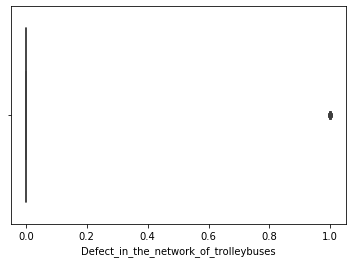

In [170]:
#print(df.Defect_in_the_network_of_trolleybuses.unique())
print(df['Defect_in_the_network_of_trolleybuses'].value_counts(dropna=False))
#Defect_in_the_network_of_trolleybuses feature has 118 occurances as 0.0 and 17 occurances as YES. 2 missing values
#and 1 occurances of 3.0, -8.0 and 2.0. -8 can be considered as outlier.

#This feature also looks categorical and we can represent it as 0.0, YES as 1.0, missing value is replaced with mode
#0.0 is considered as NO and rest of the values as YES
print(df['Defect_in_the_network_of_trolleybuses'].mode)

df.loc[(df.Defect_in_the_network_of_trolleybuses == ' '),'Defect_in_the_network_of_trolleybuses']=' 0.0'
df.loc[(df.Defect_in_the_network_of_trolleybuses == ' YES'),'Defect_in_the_network_of_trolleybuses']=' 1.0'
df.loc[(df.Defect_in_the_network_of_trolleybuses == ' 2.0'),'Defect_in_the_network_of_trolleybuses']=' 1.0'
df.loc[(df.Defect_in_the_network_of_trolleybuses == ' 3.0'),'Defect_in_the_network_of_trolleybuses']=' 1.0'
#Replace outlier with mode 
df.loc[(df.Defect_in_the_network_of_trolleybuses == ' -8.0'),'Defect_in_the_network_of_trolleybuses']=' 0.0'
print(df['Defect_in_the_network_of_trolleybuses'].value_counts(dropna=False))

df['Defect_in_the_network_of_trolleybuses'] = pd.to_numeric(df['Defect_in_the_network_of_trolleybuses'],errors='coerce')
print(df['Defect_in_the_network_of_trolleybuses'].value_counts(dropna=False))

sns.boxplot('Defect_in_the_network_of_trolleybuses', data = df)

#### Exploratory Analysis for  Tree_on_the_road feature

0.0    134
1.0      6
Name: Tree_on_the_road, dtype: int64


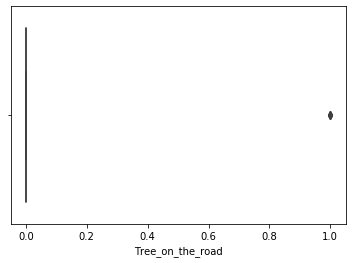

In [171]:
#print(df.Tree_on_the_road.unique())
print(df['Tree_on_the_road'].value_counts(dropna=False))
df['Tree_on_the_road'] = pd.to_numeric(df['Tree_on_the_road'],errors='coerce')
#Tree_on_the_road feature has values 0 and 1 so it's categorical by nature and values are 0 and 1
#so we dont need to create any new feature/s for this.

sns.boxplot('Tree_on_the_road', data = df)

#### Exploratory Analysis for Semaphore_off feature

 0.0    125
 1.0     12
 4.0      1
 2.0      1
          1
Name: Semaphore_off, dtype: int64


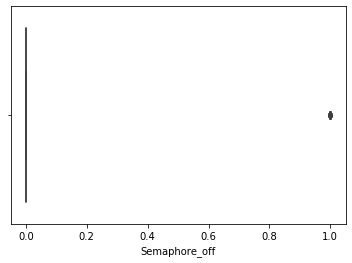

In [172]:
#print(df.Semaphore_off.unique())
print(df['Semaphore_off'].value_counts(dropna=False))
#print(df['Semaphore_off'].mode())
#Semaphore_off has 125 occurances on 0, 12 occurance of YES, 1 occurance of 2.0, 4.0 and 1 missing value. 
#The feature looks like categorical in nature if we consider 0.0 ~ N0, 1.0 ~ YES so we can replace missing value with 
#mode and convert it to numerical with 0.0 as 0.0 and rest of the values as 1.0 and we don't need to create any new 
#feature/column
df.loc[(df.Semaphore_off == ' '),'Semaphore_off']=' 0.0'
df.loc[(df.Semaphore_off == ' YES'),'Semaphore_off']=' 1.0'
df.loc[(df.Semaphore_off == ' 2.0'),'Semaphore_off']=' 1.0'
df.loc[(df.Semaphore_off == ' 4.0'),'Semaphore_off']=' 1.0'
#print(df.Semaphore_off.unique())
df['Semaphore_off'] = pd.to_numeric(df['Semaphore_off'],errors='coerce')
#print(df.Semaphore_off.unique())

sns.boxplot('Semaphore_off', data = df)

#### Exploratory Analysis for Intermittent_Semaphore feature

0.0    138
1.0      2
Name: Intermittent_Semaphore, dtype: int64


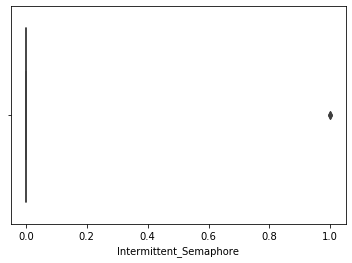

In [173]:
#print(df.Intermittent_Semaphore.unique())
print(df['Intermittent_Semaphore'].value_counts(dropna=False))
#Transform values to numeric values
df['Intermittent_Semaphore'] = pd.to_numeric(df['Intermittent_Semaphore'],errors='coerce')
#Intermittent_Semaphore feature has values 0 and 1 so it's categorical by nature and values are 0 and 1
#so we dont need to create any new feature/s for this.

sns.boxplot('Intermittent_Semaphore', data = df)

### Frequency distribution of Slowness_in_traffic_percent

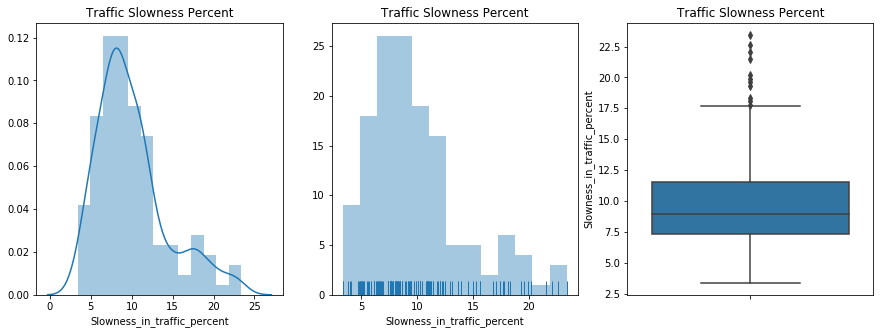

In [174]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.distplot(df['Slowness_in_traffic_percent']).set_title('Traffic Slowness Percent');

plt.subplot(1,3,2)
sns.distplot(df['Slowness_in_traffic_percent'], kde=False, rug=True).set_title('Traffic Slowness Percent');

plt.subplot(1,3,3)
plt.title('Traffic Slowness Percent')
sns.boxplot(y=df['Slowness_in_traffic_percent'])

In [175]:
print(df.Slowness_in_traffic_percent.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    140.000000
mean       9.980714
std        4.323583
min        3.400000
25%        7.300000
50%        8.950000
75%       11.500000
85%       14.005000
90%       17.130000
100%      23.400000
max       23.400000
Name: Slowness_in_traffic_percent, dtype: float64


In [176]:
dframe = df

# Feature Subset Selection

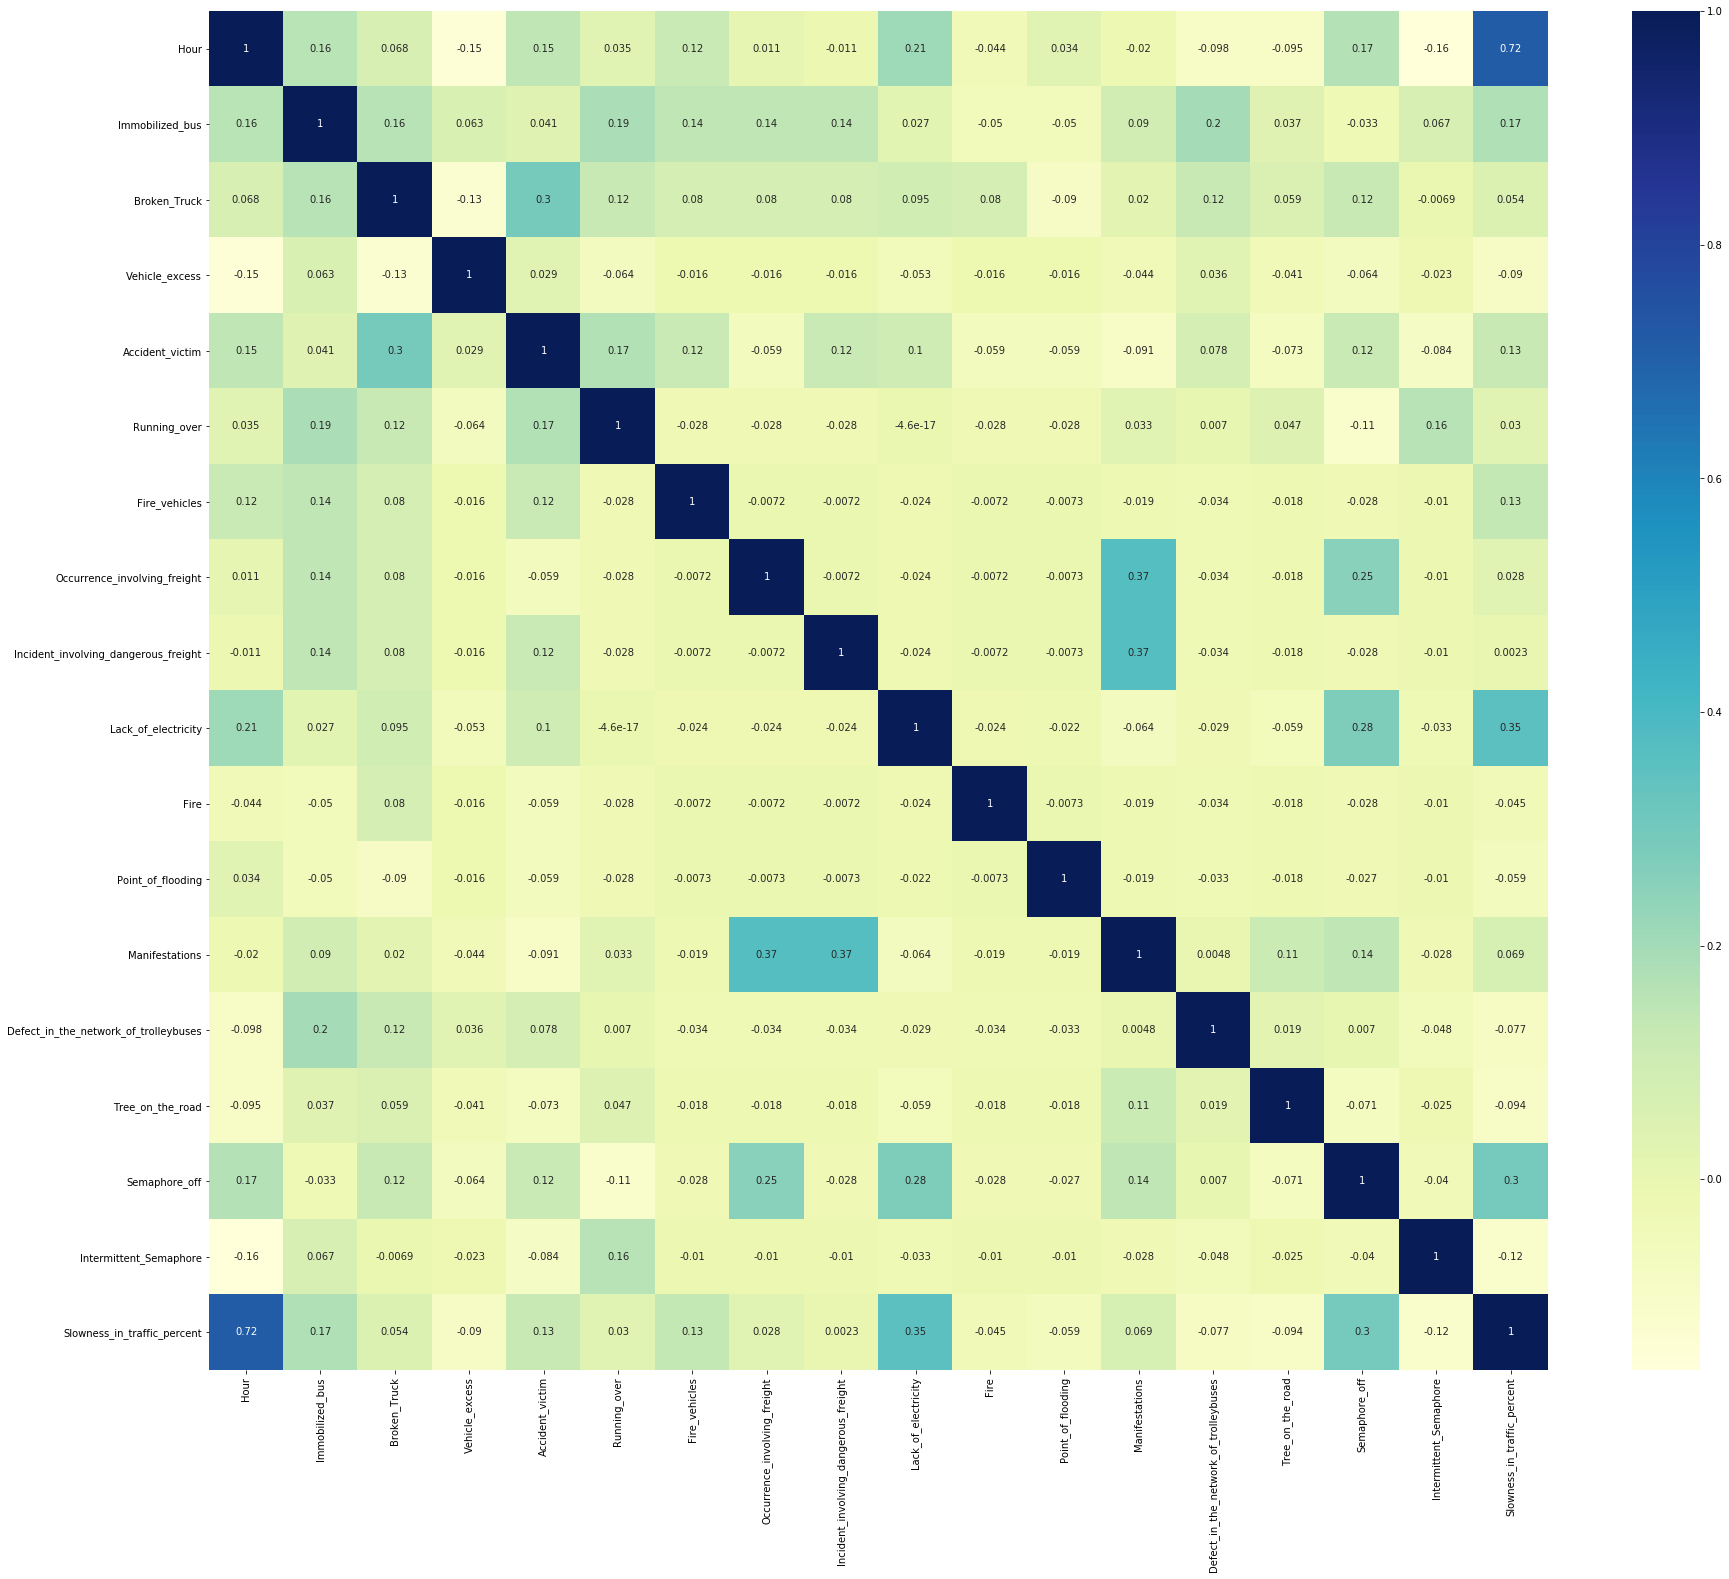

In [177]:
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

###### Hour, Lack_of_electricity, Semaphore_off, Fire_vehicles are some of the important features. 

### Important Features

In [178]:
def show_top_univariate_filters(data, score_func, top_k):
    X = data.iloc[:,0:16]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    if score_func == "chi2":
        func = chi2
    elif score_func == "f_classif":
        func = f_classif
    elif score_func == "mutual_info_classif":
        func = mutual_info_classif
    
    #apply SelectKBest class to extract top k best features
    bestfeatures = SelectKBest(score_func=func, k=top_k)
    fit = bestfeatures.fit(X,y)

    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)

    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(top_k,'Score'))  #print 10 best features

In [179]:
df['Slowness_in_traffic_percent'] = pd.cut(df.Slowness_in_traffic_percent, bins=5, labels=np.arange(5), right=False)


In [180]:
show_top_univariate_filters(df, 'chi2', 5)

                  Specs        Score
11    Point_of_flooding  5922.743734
0                  Hour   296.823094
9   Lack_of_electricity    29.855108
15        Semaphore_off    12.640023
6         Fire_vehicles    11.727273


In [181]:
show_top_univariate_filters(df, 'f_classif', 5)

                           Specs      Score
0                           Hour  33.371781
9            Lack_of_electricity  10.061521
15                 Semaphore_off   3.763240
6                  Fire_vehicles   3.109821
7   Occurrence_involving_freight   1.620536


# Model building

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [183]:
def prepare_decision_tree(data, show_matrix=False, show_accuracy=True, show_report=False, show_visual=False):
    # Split the data into independent and target attributes
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length - 1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    #Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)
    
    #Construct decision tree
    dt = DecisionTreeClassifier(random_state=100)
    dt.fit(X_train, y_train)

    #Use the decision tree for prediction on test data
    y_pred = dt.predict(X_test)
    
    #Prepare the confusion matrix
    actuals = np.array(y_test)
    predictions = np.array(y_pred)
    
    if show_matrix:
        print("Confusion Matrix : ")
        print(confusion_matrix(actuals, predictions), "\n")

    #Compute accuracy 
    if show_accuracy:
        print ("Accuracy : ", accuracy_score(y_test,y_pred)*100, "\n") 

    #Generate classification report
    if show_report:
        print("Classification Report : \n", classification_report(y_test, y_pred), "\n") 

    #Show the important features visually
    if show_visual:
        importances=pd.Series(dt.feature_importances_, index=X.columns).sort_values()
        importances.plot(kind='barh', figsize=(12,8))
    
    return dt

In [184]:
prepare_decision_tree(df)

Accuracy :  59.523809523809526 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

Confusion Matrix : 
[[ 7  2  1  0  0]
 [ 4 14  4  0  0]
 [ 0  3  2  0  0]
 [ 0  1  0  0  0]
 [ 0  0  2  0  2]] 

Accuracy :  59.523809523809526 

Classification Report : 
               precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.70      0.64      0.67        22
           2       0.22      0.40      0.29         5
           3       0.00      0.00      0.00         1
           4       1.00      0.50      0.67         4

    accuracy                           0.60        42
   macro avg       0.51      0.45      0.46        42
weighted avg       0.64      0.60      0.61        42
 



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

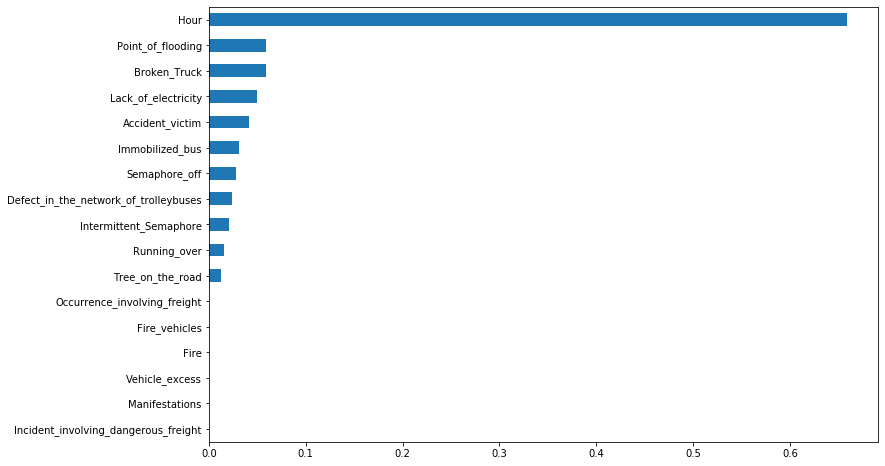

In [185]:
prepare_decision_tree(df, True, True, True, True)

In [186]:
def predict_accuracy_by_feature_elimination(data, features_to_be_removed, show_visual):
    #Prepare the dataset by removing the features mentioned
    for feature in features_to_be_removed:
        data = data.drop(feature, axis=1)

    #Call Decision tree function to get the accuracy results
    prepare_decision_tree(data, show_visual = show_visual) 

Accuracy :  54.761904761904766 



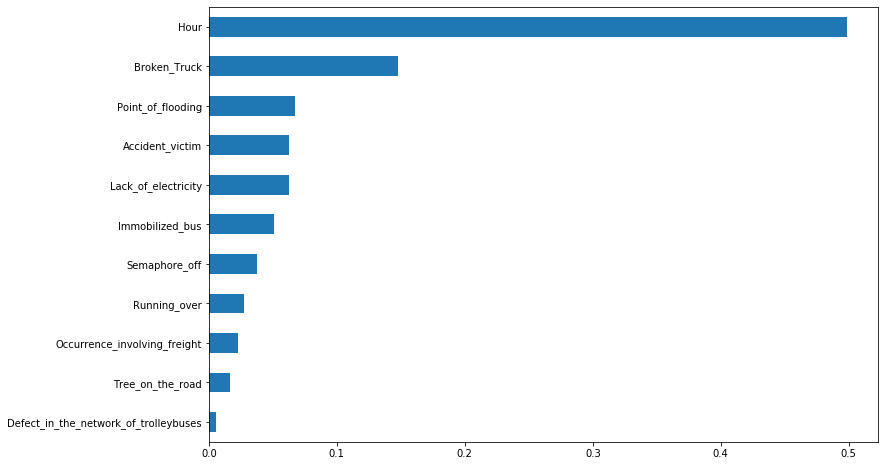

In [187]:
data=df
features_to_be_removed = ['Fire','Vehicle_excess', 'Intermittent_Semaphore','Fire_vehicles','Manifestations','Incident_involving_dangerous_freight']
predict_accuracy_by_feature_elimination(data, features_to_be_removed, show_visual=True)

Accuracy :  57.14285714285714 



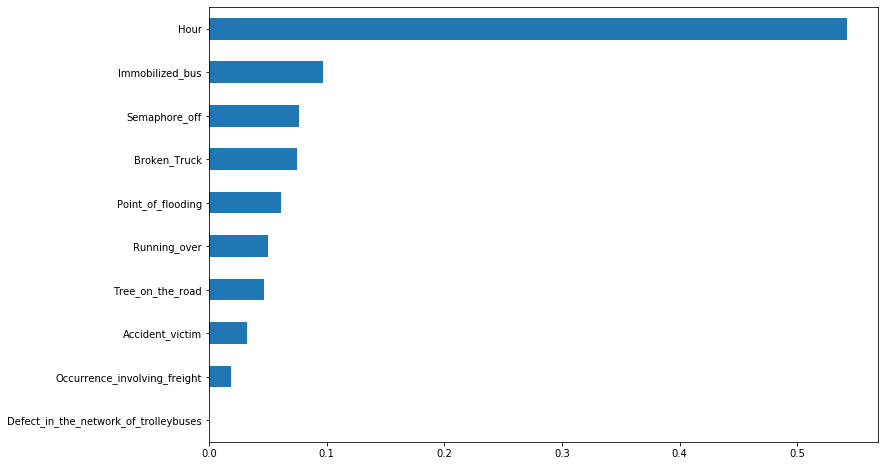

In [188]:
features_to_be_removed = ['Fire','Vehicle_excess', 'Intermittent_Semaphore','Fire_vehicles','Manifestations','Incident_involving_dangerous_freight','Lack_of_electricity']
predict_accuracy_by_feature_elimination(data, features_to_be_removed, show_visual=True)

## Linear Regression

In [189]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

In [190]:
col_=dframe.columns.tolist()[0:17]
#dframe.columns
X=dframe[['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Fire_vehicles',
       'Occurrence_involving_freight', 'Incident_involving_dangerous_freight',
       'Lack_of_electricity', 'Fire', 'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore']]
y=dframe[['Slowness_in_traffic_percent']]

In [191]:
ss=StandardScaler()
X_std=ss.fit_transform(X)

In [192]:
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (98, 17)
Test data size: (42, 17)


In [193]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)

In [194]:
print('Intercept:',lr_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))

Intercept: [14.54216309]
--------------------------------
Slope:


[('Hour',
  array([ 5.33344104e-01,  1.60666013e-01, -8.97732108e-03,  1.36661857e-02,
         -6.38860410e-02,  2.49787179e-02,  7.69377033e-02,  1.02883050e-02,
         -3.58078749e-02, -1.10058724e-01,  8.11439804e-12,  1.57065854e+02,
          3.66565357e-02, -8.98657053e-02, -2.08862553e-02,  5.35134582e-02,
         -7.15863763e-02]))]

In [195]:
y_pred=lr_model.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 288.0110573909828


In [196]:
# write function to measure RMSE
def train_test_RMSE(feature):
    X=dframe[feature]
    y=dframe['Slowness_in_traffic_percent']
    X_std_one=ss.fit_transform(X)
    X_trainR,X_testR,y_trainR,y_testR=train_test_split(X_std_one,y,test_size=0.3,random_state=42)
    lr_model_one=lr.fit(X_trainR,y_trainR)
    y_predR=lr_model_one.predict(X_testR)
    return np.sqrt(mean_squared_error(y_testR,y_predR))

### Forward selection RMSE

In [197]:
print('RMSE with Features as',col_[0:1],train_test_RMSE(col_[0:1]))
print('-------------------------')
print('RMSE with Features as',col_[0:2],train_test_RMSE(col_[0:2]))
print('-------------------------')
print('RMSE with Features as',col_[0:3],train_test_RMSE(col_[0:3]))
print('-------------------------')
print('RMSE with Features as',col_[0:4],train_test_RMSE(col_[0:4]))
print('-------------------------')
print('RMSE with Features as',col_[0:5],train_test_RMSE(col_[0:5]))
print('-------------------------')
print('RMSE with Features as',col_[0:6],train_test_RMSE(col_[0:6]))
print('-------------------------')
print('RMSE with Features as',col_[0:7],train_test_RMSE(col_[0:7]))
print('-------------------------')
print('RMSE with Features as',col_[0:8],train_test_RMSE(col_[0:8]))
print('-------------------------')
print('RMSE with Features as',col_[0:9],train_test_RMSE(col_[0:9]))
print('-------------------------')
print('RMSE with Features as',col_[0:10],train_test_RMSE(col_[0:10]))
print('-------------------------')
print('RMSE with Features as',col_[0:11],train_test_RMSE(col_[0:11]))
print('-------------------------')
print('RMSE with Features as',col_[0:12],train_test_RMSE(col_[0:12]))
print('-------------------------')
print('RMSE with Features as',col_[0:13],train_test_RMSE(col_[0:13]))
print('-------------------------')
print('RMSE with Features as',col_[0:14],train_test_RMSE(col_[0:14]))
print('-------------------------')
print('RMSE with Features as',col_[0:15],train_test_RMSE(col_[0:15]))
print('-------------------------')
print('RMSE with Features as',col_[0:16],train_test_RMSE(col_[0:16]))
print('-------------------------')
print('RMSE with Features as',col_[0:17],train_test_RMSE(col_[0:17]))

RMSE with Features as ['Hour'] 0.9536738756777372
-------------------------
RMSE with Features as ['Hour', 'Immobilized_bus'] 0.9614699521584869
-------------------------
RMSE with Features as ['Hour', 'Immobilized_bus', 'Broken_Truck'] 0.9626712141395617
-------------------------
RMSE with Features as ['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess'] 0.9626450760827997
-------------------------
RMSE with Features as ['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess', 'Accident_victim'] 0.9718675680666486
-------------------------
RMSE with Features as ['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess', 'Accident_victim', 'Running_over'] 0.9729816323588406
-------------------------
RMSE with Features as ['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess', 'Accident_victim', 'Running_over', 'Fire_vehicles'] 0.9794562134389881
-------------------------
RMSE with Features as ['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess', 'Accident_vi

## RFE

In [198]:
from sklearn.feature_selection import RFE

In [199]:
def get_top_k_features_by_rfe(data, dt, top_k, show_results=True):
    #Preprare the independant and target attributes
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length-1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    #Initializing RFE model
    rfe = RFE(dt, top_k)

    #Transforming data using RFE
    X_rfe = rfe.fit_transform(X,y)  
    
    #Fitting the data to model
    model = dt.fit(X_rfe,y)
    
    #Prepare top k feature list 
    indx= 0 
    feature_list = []
    for col in X.columns:
        if rfe.ranking_[indx] == 1:
            feature_list.append(col)
        indx = indx + 1
    
    if show_results:
        print("Num Features: %d\n" % rfe.n_features_)
        print("Selected Features :" , feature_list)
        #print("Feature Ranking: %s" % rfe.ranking_)  

    return feature_list

In [200]:
dt = prepare_decision_tree(df, show_visual = False) 

Accuracy :  54.761904761904766 



In [201]:
get_top_k_features_by_rfe(df, dt, 5, show_results=True)

Num Features: 5

Selected Features : ['Hour', 'Broken_Truck', 'Accident_victim', 'Running_over', 'Point_of_flooding']


['Hour',
 'Broken_Truck',
 'Accident_victim',
 'Running_over',
 'Point_of_flooding']